In [ ]:
import os

# Add this line before saving the file
os.makedirs("data", exist_ok=True)


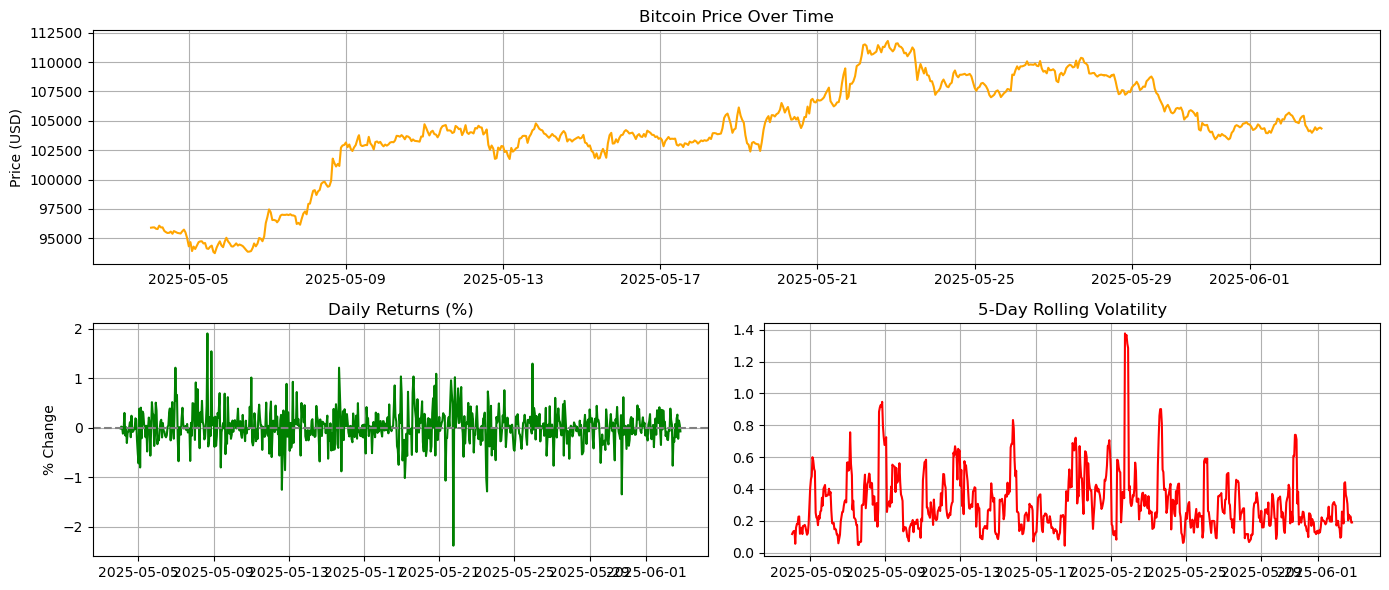


[📊] Latest Bitcoin Price: $104344.60
[📈] Daily Return: -0.08%
[⚠️] Volatility: 0.19%
⏸️ Suggestion: Hold or wait


In [ ]:
import matplotlib.pyplot as plt

def visualize(df, coin):
    plt.figure(figsize=(14, 6))

    # Price plot
    plt.subplot(2, 1, 1)
    plt.plot(df['date'], df['price'], label='Price', color='orange')
    plt.title(f'{coin.capitalize()} Price Over Time')
    plt.ylabel('Price (USD)')
    plt.grid(True)

    # Return plot
    plt.subplot(2, 2, 3)
    plt.plot(df['date'], df['return_%'], label='Daily Return %', color='green')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Daily Returns (%)')
    plt.ylabel('% Change')
    plt.grid(True)

    # Volatility plot
    plt.subplot(2, 2, 4)
    plt.plot(df['date'], df['volatility'], label='Volatility', color='red')
    plt.title('5-Day Rolling Volatility')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Simple Buy/Sell Signal
    latest = df.iloc[-1]
    print(f"\n[📊] Latest {coin.capitalize()} Price: ${latest['price']:.2f}")
    print(f"[📈] Daily Return: {latest['return_%']:.2f}%")
    print(f"[⚠️] Volatility: {latest['volatility']:.2f}%")

    if latest['return_%'] > 2 and latest['volatility'] < 3:
        print("✅ Suggestion: Consider Buying (low volatility, high gain)")
    elif latest['return_%'] < -2:
        print("🔻 Suggestion: Consider Selling (sharp drop)")
    else:
        print("⏸️ Suggestion: Hold or wait")

# Add this at the end of your main block
visualize(df, coin)


[✅] Data saved to data/bitcoin_prices.csv


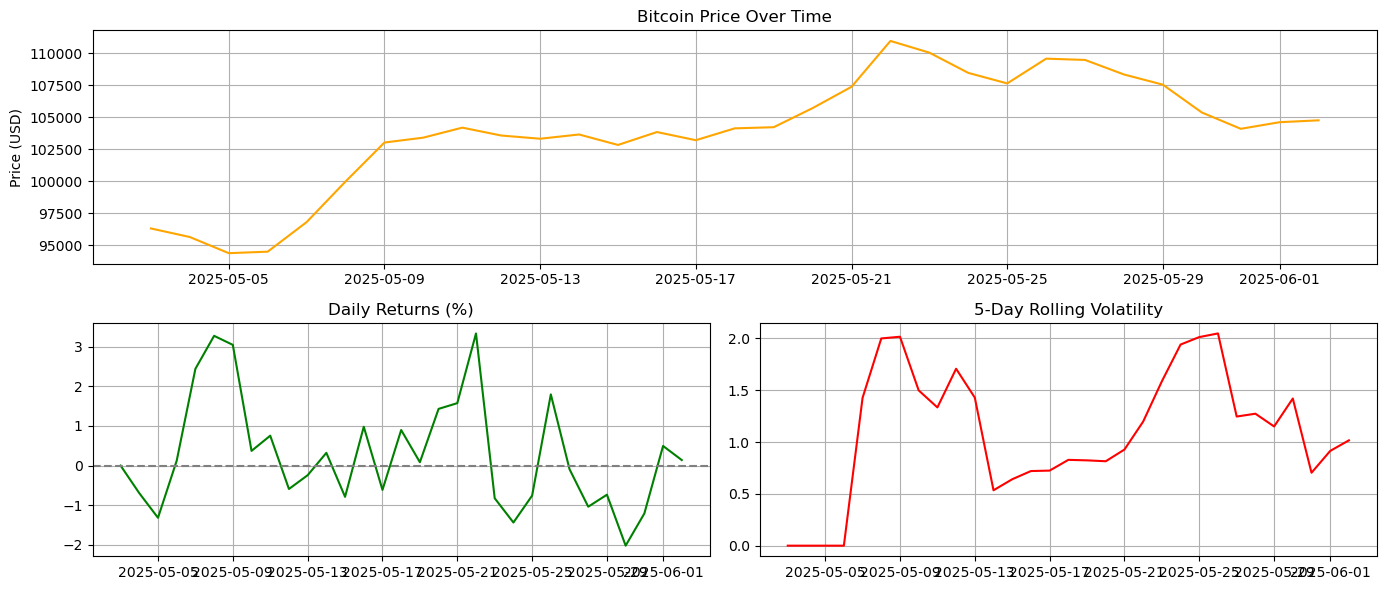


[📊] Latest Bitcoin Price: $104751.98
[📈] Daily Return: 0.14%
[⚠️] Volatility: 1.02%
⏸️ Suggestion: Hold or wait


In [9]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Fetch data
def fetch_crypto_data(coin_id="bitcoin", days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)

    if response.status_code != 200:
        raise Exception(f"Failed to fetch data: {response.text}")

    data = response.json()
    prices = data["prices"]

    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms").dt.date
    df = df.groupby("date").mean().reset_index()

    # Step 2: Add returns and volatility
    df["return_%"] = df["price"].pct_change().fillna(0) * 100
    df["volatility"] = df["return_%"].rolling(window=5).std().fillna(0)
    return df

# Step 3: Save to CSV
def save_csv(df, coin):
    os.makedirs("data", exist_ok=True)
    output_path = f"data/{coin}_prices.csv"
    df.to_csv(output_path, index=False)
    print(f"[✅] Data saved to {output_path}")

# Step 4: Visualize + Predict
def visualize(df, coin):
    plt.figure(figsize=(14, 6))

    # Price plot
    plt.subplot(2, 1, 1)
    plt.plot(df['date'], df['price'], color='orange')
    plt.title(f'{coin.capitalize()} Price Over Time')
    plt.ylabel('Price (USD)')
    plt.grid(True)

    # Return % plot
    plt.subplot(2, 2, 3)
    plt.plot(df['date'], df['return_%'], color='green')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Daily Returns (%)')
    plt.grid(True)

    # Volatility plot
    plt.subplot(2, 2, 4)
    plt.plot(df['date'], df['volatility'], color='red')
    plt.title('5-Day Rolling Volatility')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Buy/Sell Prediction
    latest = df.iloc[-1]
    print(f"\n[📊] Latest {coin.capitalize()} Price: ${latest['price']:.2f}")
    print(f"[📈] Daily Return: {latest['return_%']:.2f}%")
    print(f"[⚠️] Volatility: {latest['volatility']:.2f}%")

    if latest['return_%'] > 2 and latest['volatility'] < 3:
        print("✅ Suggestion: Consider Buying (low volatility, high gain)")
    elif latest['return_%'] < -2:
        print("🔻 Suggestion: Consider Selling (sharp drop)")
    else:
        print("⏸️ Suggestion: Hold or wait")

# Step 5: Run everything
if __name__ == "__main__":
    coin = "bitcoin"
    df = fetch_crypto_data(coin)
    save_csv(df, coin)
    visualize(df, coin)


In [11]:
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt

def fetch_crypto_data(coin_id="bitcoin", days=30):
    url = f"https://api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {"vs_currency": "usd", "days": days}
    response = requests.get(url, params=params)

    if response.status_code != 200:
        raise Exception(f"Failed to fetch data: {response.text}")

    data = response.json()
    prices = data["prices"]

    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms").dt.date
    df = df.groupby("date").mean().reset_index()
    df["return_%"] = df["price"].pct_change().fillna(0) * 100
    df["volatility"] = df["return_%"].rolling(window=5).std().fillna(0)
    return df

def save_csv(df, coin):
    os.makedirs("data", exist_ok=True)
    output_path = f"data/{coin}_prices.csv"
    df.to_csv(output_path, index=False)
    print(f"[✅] Data saved to {output_path}")

def visualize(df, coin):
    plt.figure(figsize=(14, 6))

    plt.subplot(2, 1, 1)
    plt.plot(df['date'], df['price'], label='Price', color='orange')
    plt.title(f'{coin.capitalize()} Price Over Time')
    plt.ylabel('Price (USD)')
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(df['date'], df['return_%'], label='Returns', color='green')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Daily Returns (%)')
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(df['date'], df['volatility'], label='Volatility', color='red')
    plt.title('5-Day Rolling Volatility')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Summary
    latest = df.iloc[-1]
    print(f"\n[📊] Latest {coin.capitalize()} Price: ${latest['price']:.2f}")
    print(f"[📈] Daily Return: {latest['return_%']:.2f}%")
    print(f"[⚠️] Volatility: {latest['volatility']:.2f}%")

    if latest['return_%'] > 2 and latest['volatility'] < 3:
        print("✅ Suggestion: Consider Buying (low volatility, high gain)")
    elif latest['return_%'] < -2:
        print("🔻 Suggestion: Consider Selling (sharp drop)")
    else:
        print("⏸️ Suggestion: Hold or wait")



===== BITCOIN =====
[✅] Data saved to data/bitcoin_prices.csv


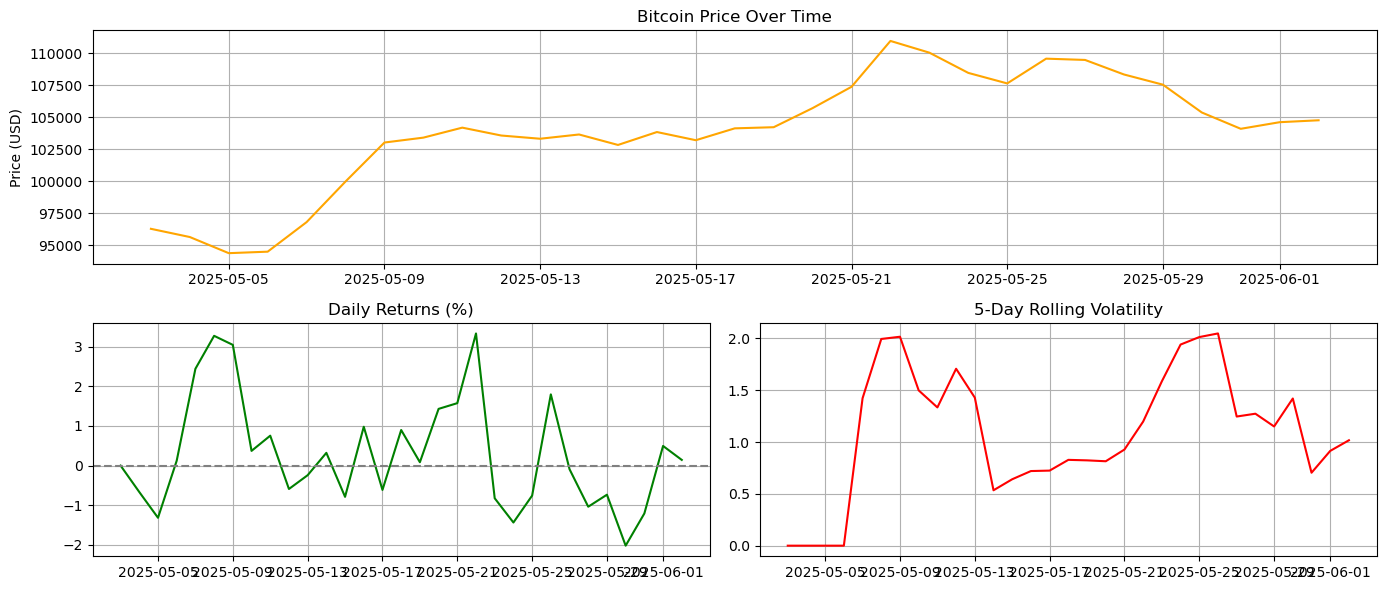


[📊] Latest Bitcoin Price: $104755.85
[📈] Daily Return: 0.14%
[⚠️] Volatility: 1.02%
⏸️ Suggestion: Hold or wait

===== ETHEREUM =====
[✅] Data saved to data/ethereum_prices.csv


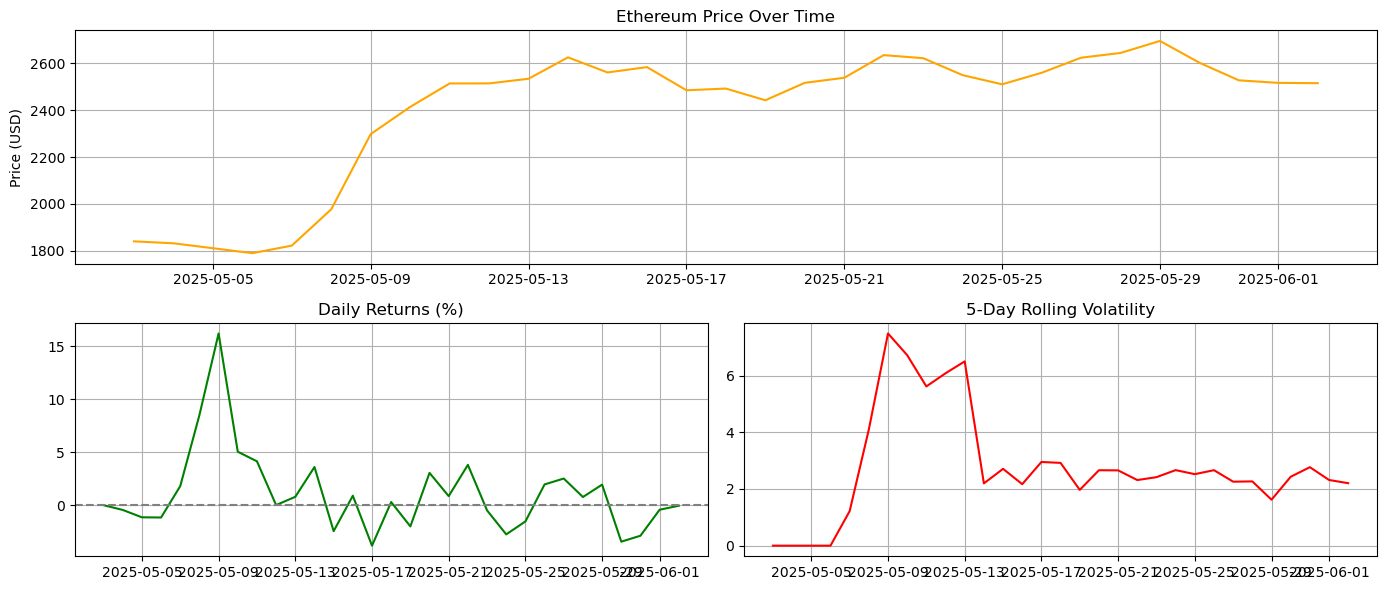


[📊] Latest Ethereum Price: $2515.25
[📈] Daily Return: -0.05%
[⚠️] Volatility: 2.20%
⏸️ Suggestion: Hold or wait

===== SOLANA =====
[✅] Data saved to data/solana_prices.csv


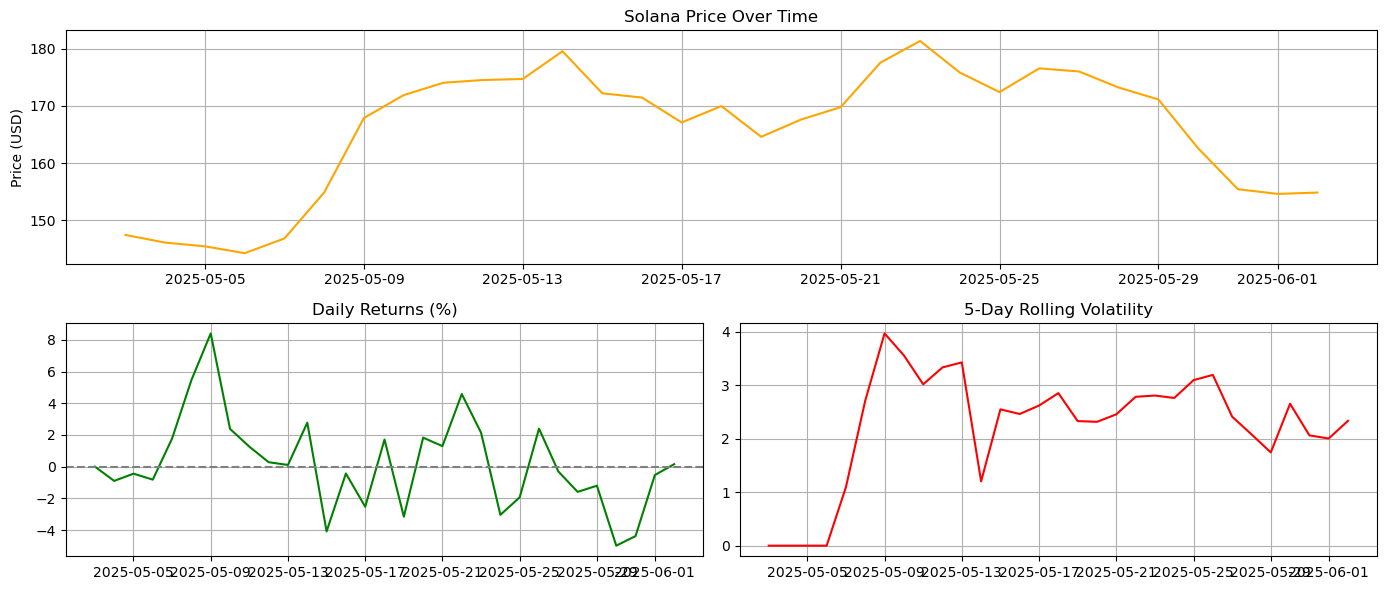


[📊] Latest Solana Price: $154.86
[📈] Daily Return: 0.15%
[⚠️] Volatility: 2.34%
⏸️ Suggestion: Hold or wait


In [12]:
coins = ["bitcoin", "ethereum", "solana"]

for coin in coins:
    print(f"\n===== {coin.upper()} =====")
    df = fetch_crypto_data(coin)
    save_csv(df, coin)
    visualize(df, coin)
